# **Bank Customer Churn Prediction**



> Nama: Berryl Bagas Wirawan


> Bahasa Pemrograman: Python





# Data Understanding

## Introduction to Dataset

In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [129]:
df=pd.read_csv("/content/Dataset_9 - Banking.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


**Data:**

1.) RowNumber: Nomor record pada dataset

2.) CustomerID: ID nasabah.

3.) Surname: Nama nasabah.

4.) CreditScore: Skor kredit nasabah.

5.) Geography: Tempat tinggal nasabah.

6.) Gender: Jenis kelamin nasabah.

7.) Age: Umur nasabah.

8.) Tenure: Lamanya menjadi nasabah (dalam tahun).

9.) Balance: Indikator churn pelanggan yang sangat baik.

10.) NumOfProducts: Jumlah produk bank.

11.) HasCrCard: Nasabah memiliki kartu kredit atau tidak.

12.) IsActiveMember: Nasabah aktif atau tidak.

13.) EstimatedSalary: Estimasi penghasilan.

14.) Exited: Nasabah meninggalkan bank (Churn) atau tidak

## Business Problem



1.  Bagaimana karakteristik user bank yang mengalami churn?
2.  Bagaimana cara untuk memprediksi keputusan user bank untuk churn?



# Data Preparation

## Check Missing Value

In [11]:
df.isnull().sum(axis=0)

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Tidak ada missing value pada dataset ini.

## Check Datatype

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


Masih ada beberapa peubah yang memiliki type data object, maka harus diubah ke tipe data numerik atau kategori

In [108]:
def data_types(data):
  nominal = ['RowNumber','CustomerId','Surname','Geography','Gender','HasCrCard','IsActiveMember','Exited']
  ordinal = ['Age']
  numeric =  ['Tenure','Balance','NumOfProducts','EstimatedSalary']

  #convert
  data[nominal] = data[nominal].astype( 'category')
  data[ordinal] = data[ordinal].astype(  'category')


  return data

df = data_types(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   RowNumber        10000 non-null  category
 1   CustomerId       10000 non-null  category
 2   Surname          10000 non-null  category
 3   CreditScore      10000 non-null  int64   
 4   Geography        10000 non-null  category
 5   Gender           10000 non-null  category
 6   Age              10000 non-null  category
 7   Tenure           10000 non-null  int64   
 8   Balance          10000 non-null  float64 
 9   NumOfProducts    10000 non-null  int64   
 10  HasCrCard        10000 non-null  category
 11  IsActiveMember   10000 non-null  category
 12  EstimatedSalary  10000 non-null  float64 
 13  Exited           10000 non-null  category
dtypes: category(9), float64(2), int64(3)
memory usage: 1.4 MB


Data siap digunakan untuk EDA

# Exploratory Data Analysis

## Data Describe

In [14]:
df.describe()

,CreditScore,Tenure,Balance,NumOfProducts,EstimatedSalary
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,5.012800,76485.889288,1.530200,100090.239881
std,96.653299,2.892174,62397.405202,0.581654,57510.492818
min,350.000000,0.000000,0.000000,1.000000,11.580000
25%,584.000000,3.000000,0.000000,1.000000,51002.110000
50%,652.000000,5.000000,97198.540000,1.000000,100193.915000
75%,718.000000,7.000000,127644.240000,2.000000,149388.247500
max,850.000000,10.000000,250898.090000,4.000000,199992.480000


## Exited = 1 (Churn)

In [131]:
df.groupby(['Geography']).agg({'Exited':'sum'}).reset_index()

,Geography,Exited
0,France,810
1,Germany,814
2,Spain,413


In [140]:
df.groupby(['Gender']).agg({'Exited':'sum'}).reset_index()

,Gender,Exited
0,Female,1139
1,Male,898


Dapat kita lihat bahwa customer dari negara Spain merupakan customer yang jarang churn, sedangkan untuk gender yang paling banyak mengalami churn yaitu wanita. 

## Correlations

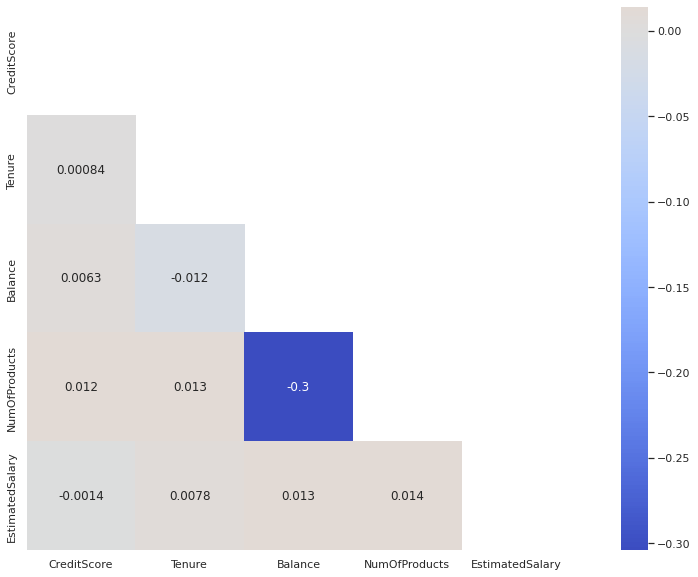

In [109]:
corr = df.corr()

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)]=True
with sns.axes_style('white'):
    fig, ax = plt.subplots(figsize=(18,10))
    sns.heatmap(corr,  mask=mask, annot=True, cmap='coolwarm', center=0, square=True)

Text(0.5, 0.95, 'Relationship between numerical features')

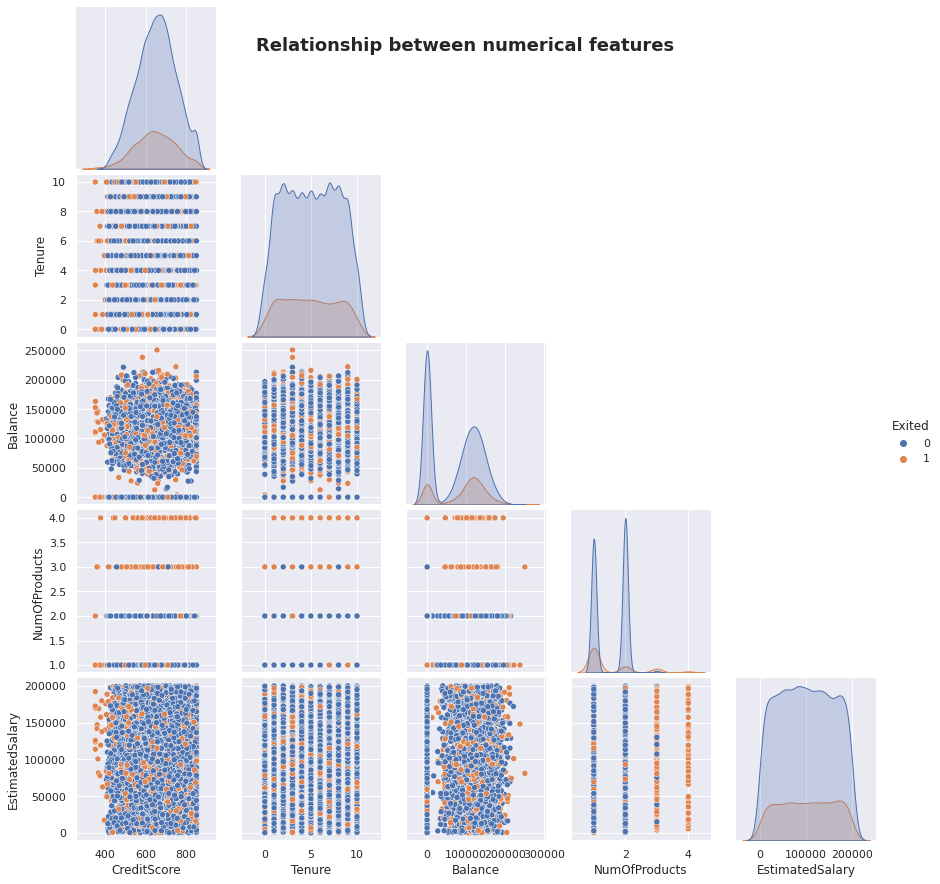

In [111]:
sns.pairplot(df, corner=True, hue='Exited')
plt.suptitle("Relationship between numerical features", x=0.5 ,y=0.95, size=18, weight='bold')

Dapat kita lihat dari scatterplot di atas, peubah Approved_Conversion ternyata memiliki hubungan linear yang kuat dengan Total_Conversion.

# Data Preprocessing

## Encoder

In [75]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Exited,Female,Male,France,Germany,Spain,HasCrCard_0,HasCrCard_1,IsActiveMember_0,IsActiveMember_1
0,1,15634602,Hargrave,-0.246269,0.416667,-0.75,-0.761480,0.0,0.011739,1,1,0,1,0,0,0,1,0,1
1,2,15647311,Hill,-0.328358,0.333333,-1.00,-0.104906,0.0,0.125512,0,1,0,0,0,1,1,0,0,1
2,3,15619304,Onio,-1.119403,0.416667,0.75,0.489346,2.0,0.139630,1,1,0,1,0,0,0,1,1,0
3,4,15701354,Boni,0.350746,0.166667,-1.00,-0.761480,1.0,-0.064717,0,1,0,1,0,0,1,0,1,0
4,5,15737888,Mitchell,1.477612,0.500000,-0.75,0.221806,0.0,-0.214561,0,1,0,0,0,1,0,1,0,1


In [67]:
import category_encoders as ce
def handling_preprocessing(data):

  # (nominal)
  data = pd.get_dummies(data, columns=['Gender'], prefix='', prefix_sep='')
  data = pd.get_dummies(data, columns=['Geography'], prefix='', prefix_sep='')
  data = pd.get_dummies(data, columns=['HasCrCard'])
  data = pd.get_dummies(data, columns=['IsActiveMember'])

  return data
df = handling_preprocessing(df)
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Exited,Female,Male,France,Germany,Spain,HasCrCard_0,HasCrCard_1,IsActiveMember_0,IsActiveMember_1
0,1,15634602,Hargrave,619,42,2,0.00,1,101348.88,1,1,0,1,0,0,0,1,0,1
1,2,15647311,Hill,608,41,1,83807.86,1,112542.58,0,1,0,0,0,1,1,0,0,1
2,3,15619304,Onio,502,42,8,159660.80,3,113931.57,1,1,0,1,0,0,0,1,1,0
3,4,15701354,Boni,699,39,1,0.00,2,93826.63,0,1,0,1,0,0,1,0,1,0
4,5,15737888,Mitchell,850,43,2,125510.82,1,79084.10,0,1,0,0,0,1,0,1,0,1


## Feature Scalling

In [68]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
df[['Age','CreditScore','Tenure','Balance','NumOfProducts','EstimatedSalary']] = scaler.fit_transform(df[['Age','CreditScore','Tenure','Balance','NumOfProducts','EstimatedSalary']])
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Exited,Female,Male,France,Germany,Spain,HasCrCard_0,HasCrCard_1,IsActiveMember_0,IsActiveMember_1
0,1,15634602,Hargrave,-0.246269,0.416667,-0.75,-0.761480,0.0,0.011739,1,1,0,1,0,0,0,1,0,1
1,2,15647311,Hill,-0.328358,0.333333,-1.00,-0.104906,0.0,0.125512,0,1,0,0,0,1,1,0,0,1
2,3,15619304,Onio,-1.119403,0.416667,0.75,0.489346,2.0,0.139630,1,1,0,1,0,0,0,1,1,0
3,4,15701354,Boni,0.350746,0.166667,-1.00,-0.761480,1.0,-0.064717,0,1,0,1,0,0,1,0,1,0
4,5,15737888,Mitchell,1.477612,0.500000,-0.75,0.221806,0.0,-0.214561,0,1,0,0,0,1,0,1,0,1


# Train Test Split Data

In [69]:
from sklearn.model_selection import train_test_split

cols_X = ['CreditScore',	'Age',	'Tenure',	'Balance',	'NumOfProducts',	'EstimatedSalary','Female',
          'Male',	'France',	'Germany',	'Spain',	'HasCrCard_0',	'HasCrCard_1',	'IsActiveMember_0',	'IsActiveMember_1'] 
cols_Y = ['Exited']

X = df[cols_X]
y = df[cols_Y]

x_train, x_test, y_train, y_test =  train_test_split(X, y, test_size = 0.2, random_state = 123)

## Imbalance data

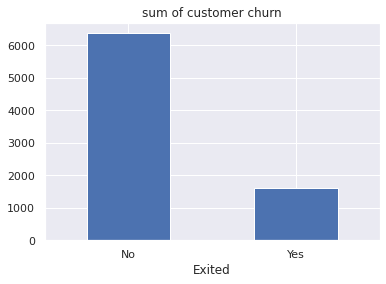

In [70]:
y_train.value_counts().plot(kind='bar')
plt.xticks([0,1],['No','Yes'], rotation=0)
plt.title('sum of customer churn')
sns.set_theme()

In [76]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy = 1)
x_smote, y_smote = smote.fit_resample(x_train,y_train)

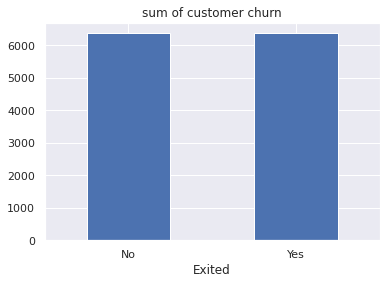

In [61]:
y_smote.value_counts().plot(kind='bar')
plt.xticks([0,1],['No','Yes'], rotation=0)
plt.title('sum of customer churn')
sns.set_theme()

# Data Modeling

## Model Train-Testing

In [62]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.neighbors import KNeighborsClassifier, NearestCentroid
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score

In [77]:
ad =  AdaBoostClassifier()
ad.fit(x_smote,y_smote) 
y_jawaban = ad.predict(x_test)
ad1 = precision_score(y_test,y_jawaban)
ad2 = recall_score(y_test,y_jawaban)
ad3 = f1_score(y_test,y_jawaban)
ad4 = accuracy_score(y_test,y_jawaban)

lr =  LogisticRegression()
lr.fit(x_smote,y_smote) 
y_jawaban = lr.predict(x_test)
lr1 = precision_score(y_test,y_jawaban)
lr2 = recall_score(y_test,y_jawaban)
lr3 = f1_score(y_test,y_jawaban)
lr4 = accuracy_score(y_test,y_jawaban)

sdg =  SGDClassifier()
sdg.fit(x_smote,y_smote) 
y_jawaban = sdg.predict(x_test)
sdg1 = precision_score(y_test,y_jawaban)
sdg2 = recall_score(y_test,y_jawaban)
sdg3 = f1_score(y_test,y_jawaban)
sdg4 = accuracy_score(y_test,y_jawaban)

lv =  LinearSVC()
lv.fit(x_smote,y_smote) 
y_jawaban = lv.predict(x_test)
lv1 = precision_score(y_test,y_jawaban)
lv2 = recall_score(y_test,y_jawaban)
lv3 = f1_score(y_test,y_jawaban)
lv4 = accuracy_score(y_test,y_jawaban)

sv =  SVC()
sv.fit(x_smote,y_smote) 
y_jawaban = sv.predict(x_test)
sv1 = precision_score(y_test,y_jawaban)
sv2 = recall_score(y_test,y_jawaban)
sv3 = f1_score(y_test,y_jawaban)
sv4 = accuracy_score(y_test,y_jawaban)

knn =  KNeighborsClassifier()
knn.fit(x_smote,y_smote) 
y_jawaban = knn.predict(x_test)
knn1 = precision_score(y_test,y_jawaban)
knn2 = recall_score(y_test,y_jawaban)
knn3 = f1_score(y_test,y_jawaban)
knn4 = accuracy_score(y_test,y_jawaban)

nc =  NearestCentroid()
nc.fit(x_smote,y_smote) 
y_jawaban = nc.predict(x_test)
nc1 = precision_score(y_test,y_jawaban)
nc2 = recall_score(y_test,y_jawaban)
nc3 = f1_score(y_test,y_jawaban)
nc4 = accuracy_score(y_test,y_jawaban)

rf =  RandomForestClassifier()
rf.fit(x_smote,y_smote) 
y_jawaban = rf.predict(x_test)
rf1 = precision_score(y_test,y_jawaban)
rf2 = recall_score(y_test,y_jawaban)
rf3 = f1_score(y_test,y_jawaban)
rf4 = accuracy_score(y_test,y_jawaban)

gb =  GradientBoostingClassifier()
gb.fit(x_smote,y_smote) 
y_jawaban = gb.predict(x_test)
gb1 = precision_score(y_test,y_jawaban)
gb2 = recall_score(y_test,y_jawaban)
gb3 = f1_score(y_test,y_jawaban)
gb4 = accuracy_score(y_test,y_jawaban)

dt =  DecisionTreeClassifier()
dt.fit(x_smote,y_smote) 
y_jawaban = dt.predict(x_test)
dt1 = precision_score(y_test,y_jawaban)
dt2 = recall_score(y_test,y_jawaban)
dt3 = f1_score(y_test,y_jawaban)
dt4 = accuracy_score(y_test,y_jawaban)

x =  XGBClassifier()
x.fit(x_smote,y_smote) 
y_jawaban = x.predict(x_test)
x1 = precision_score(y_test,y_jawaban)
x2 = recall_score(y_test,y_jawaban)
x3 = f1_score(y_test,y_jawaban)
x4 = accuracy_score(y_test,y_jawaban)

ml =  MLPClassifier()
ml.fit(x_smote,y_smote) 
y_jawaban = ml.predict(x_test)
ml1 = precision_score(y_test,y_jawaban)
ml2 = recall_score(y_test,y_jawaban)
ml3 = f1_score(y_test,y_jawaban)
ml4 = accuracy_score(y_test,y_jawaban)

In [80]:
dic = {'Model':['LogisticRegression','SGDClassifier','LinearSVC','SVC','KNeighborsClassifier','NearestCentroid','RandomForestClassifier',
                'GradientBoostingClassifier','AdaBoostClassifier','DecisionTreeClassifier','XGBClassifier','MLPClassifier'],
       'Precision':[lr1,sdg1,lv1,sv1,knn1,nc1,rf1,gb1,ad1,dt1,x1,ml1],
       'Recall':[lr2,sdg2,lv2,sv2,knn2,nc2,rf2,gb2,ad2,dt2,x2,ml2],
       'F1':[lr3,sdg3,lv3,sv3,knn3,nc3,rf3,gb3,ad3,dt3,x3,ml3],
       'Accuracy':[lr4,sdg4,lv4,sv4,knn4,nc4,rf4,gb4,ad4,dt4,x4,ml4]}
compare = pd.DataFrame(dic)
compare.sort_values(by='Accuracy',ascending=False)

,Model,Precision,Recall,F1,Accuracy
7,GradientBoostingClassifier,0.615044,0.671498,0.642032,0.8450
6,RandomForestClassifier,0.616541,0.594203,0.605166,0.8395
10,XGBClassifier,0.587629,0.688406,0.634038,0.8355
11,MLPClassifier,0.535055,0.700483,0.606695,0.8120
8,AdaBoostClassifier,0.525394,0.724638,0.609137,0.8075
3,SVC,0.513605,0.729469,0.602794,0.8010
9,DecisionTreeClassifier,0.467710,0.577295,0.516757,0.7765
4,KNeighborsClassifier,0.424194,0.635266,0.508704,0.7460
1,SGDClassifier,0.401471,0.659420,0.499086,0.7260
5,NearestCentroid,0.406849,0.717391,0.519231,0.7250


Model awal yang memiliki accuracy paling tinggi yaitu:
 

*   GradientBoostingClassifier
*   RandomForestClassifier

# Tuning Hyperparameter

Selajutnya saya akan memilih 2 model awal dengan nilai Accuracy tertinggi (GradientBoostingClassifier dan RandomForestClassifier) untuk dilakukannya Tuning Hyperparameter 

## Model Tuning Train-Test

In [93]:
gb =  GradientBoostingClassifier()
gb.fit(x_smote,y_smote) 
y_jawaban = gb.predict(x_test)
gb1 = precision_score(y_test,y_jawaban)
gb2 = recall_score(y_test,y_jawaban)
gb3 = f1_score(y_test,y_jawaban)
gb4 = accuracy_score(y_test,y_jawaban)

gridgb =  GradientBoostingClassifier(n_estimators=500,max_depth=15)
gridgb.fit(x_smote,y_smote) 
y_jawaban = gridgb.predict(x_test)
gridgb1 = precision_score(y_test,y_jawaban)
gridgb2 = recall_score(y_test,y_jawaban)
gridgb3 = f1_score(y_test,y_jawaban)
gridgb4 = accuracy_score(y_test,y_jawaban)

rf =  RandomForestClassifier()
rf.fit(x_smote,y_smote) 
y_jawaban = rf.predict(x_test)
rf1 = precision_score(y_test,y_jawaban)
rf2 = recall_score(y_test,y_jawaban)
rf3 = f1_score(y_test,y_jawaban)
rf4 = accuracy_score(y_test,y_jawaban)

gridrf =  RandomForestClassifier(criterion='gini',n_estimators=200,max_depth=15)
gridrf.fit(x_smote,y_smote) 
y_jawaban = gridrf.predict(x_test)
gridrf1 = precision_score(y_test,y_jawaban)
gridrf2 = recall_score(y_test,y_jawaban)
gridrf3 = f1_score(y_test,y_jawaban)
gridrf4 = accuracy_score(y_test,y_jawaban)


dic = {'Model':['GradientBoostingClassifier','Tuning GradientBoostingClassifier','RandomForestClassifier','Tuning RandomForestClassifier'],
       'Precision':[gb1,gridgb1,rf1,gridrf1],
       'Recall':[gb2,gridgb2,rf2,gridrf2],
       'F1':[gb3,gridgb3,rf3,gridrf3],
       'Accuracy':[gb4,gridgb4,rf4,gridrf4]}
compare = pd.DataFrame(dic)
compare

,Model,Precision,Recall,F1,Accuracy
0,GradientBoostingClassifier,0.616408,0.671498,0.642775,0.8455
1,Tuning GradientBoostingClassifier,0.685015,0.541063,0.604588,0.8535
2,RandomForestClassifier,0.619898,0.586957,0.602978,0.8400
3,Tuning RandomForestClassifier,0.598131,0.618357,0.608076,0.8350


# Model Evaluation

In [95]:
gb =  GradientBoostingClassifier(n_estimators=500,max_depth=15)
gb.fit(x_smote,y_smote) 
y_jawaban = gb.predict(x_test)
gb1 = precision_score(y_test,y_jawaban)
gb2 = recall_score(y_test,y_jawaban)
gb3 = f1_score(y_test,y_jawaban)
gb4 = accuracy_score(y_test,y_jawaban)

gridgb =  GradientBoostingClassifier(n_estimators=500,max_depth=15)
gridgb.fit(x_smote,y_smote) 
y_jawaban = gridgb.predict(x_train)
gridgb1 = precision_score(y_train,y_jawaban)
gridgb2 = recall_score(y_train,y_jawaban)
gridgb3 = f1_score(y_train,y_jawaban)
gridgb4 = accuracy_score(y_train,y_jawaban)

rf =  RandomForestClassifier(criterion='gini',n_estimators=200,max_depth=15)
rf.fit(x_smote,y_smote) 
y_jawaban = rf.predict(x_test)
rf1 = precision_score(y_test,y_jawaban)
rf2 = recall_score(y_test,y_jawaban)
rf3 = f1_score(y_test,y_jawaban)
rf4 = accuracy_score(y_test,y_jawaban)

gridrf =  RandomForestClassifier(criterion='gini',n_estimators=200,max_depth=15)
gridrf.fit(x_smote,y_smote) 
y_jawaban = gridrf.predict(x_train)
gridrf1 = precision_score(y_train,y_jawaban)
gridrf2 = recall_score(y_train,y_jawaban)
gridrf3 = f1_score(y_train,y_jawaban)
gridrf4 = accuracy_score(y_train,y_jawaban)


dic = {'Model':['Tuning GradientBoostingClassifier','Tuning GradientBoostingClassifier','Tuning RandomForestClassifier','Tuning RandomForestClassifier'],
       'Data':['Testing','Training','Testing','Training'],
       'Precision':[gb1,gridgb1,rf1,gridrf1],
       'Recall':[gb2,gridgb2,rf2,gridrf2],
       'F1':[gb3,gridgb3,rf3,gridrf3],
       'Accuracy':[gb4,gridgb4,rf4,gridrf4]}
compare = pd.DataFrame(dic)
compare

,Model,Data,Precision,Recall,F1,Accuracy
0,Tuning GradientBoostingClassifier,Testing,0.684685,0.550725,0.610442,0.854500
1,Tuning GradientBoostingClassifier,Training,1.000000,1.000000,1.000000,1.000000
2,Tuning RandomForestClassifier,Testing,0.589569,0.628019,0.608187,0.832500
3,Tuning RandomForestClassifier,Training,0.928322,0.981516,0.954178,0.980875


Model Tuning RandomForestClassifier lebih baik karena tidak overfit

# Predict Example (Tuning RandomForestClassifier)

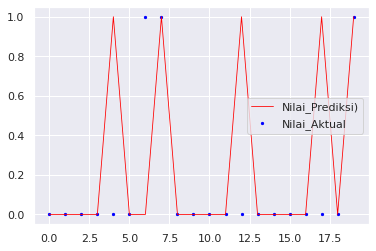

In [98]:
rf =  RandomForestClassifier(criterion='gini',n_estimators=200,max_depth=15)
rf.fit(x_smote,y_smote) 
y_jawaban = rf.predict(x_test.head(20))
x_ax = range(len(x_test.head(20)))
plt.scatter(x_ax, y_test.head(20), s=5, color="blue", label="Nilai_Aktual")
plt.plot(x_ax, y_jawaban, lw=0.8, color="red", label="Nilai_Prediksi)")
plt.legend()
plt.show()

In [100]:
b = y_test.head(20).reset_index()
b.drop('index',axis=1,inplace=True)
b= b.rename(columns={'Exited':'Nilai_Aktual'})
c = pd.DataFrame(y_jawaban)
c= c.rename(columns={0:'Nilai_Prediksi'})
predict = [b,c]
predict = pd.concat(predict,axis=1,join='inner')
predict

,Nilai_Aktual,Nilai_Prediksi
0,0,0
1,0,0
2,0,0
3,0,0
4,0,1
5,0,0
6,1,0
7,1,1
8,0,0
9,0,0


# Kesimpulan dan Saran

## Kesimpulan

Dari hasil analisis deskriptif didapatkan negara customer yang jarang mengalami churn yaitu spain sedangkan untuk jenis kelamin yang sering mengalami churn yaitu wanita.

Didapatkan model klasifikasi terbaik menggunakan RandomForestClassifier dengan nilai accuracy sebesar 0.8325 atau 83,25%